### Simple Linear Regression

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [28]:
### Read the DataSet
df = pd.read_csv('1.height-weight.csv')

In [29]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [30]:
### Dependent and independent file
x = df.iloc[:, : -1]
y = df.iloc[:, -1]

In [31]:
x.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [32]:
y.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

Text(0.5, 1.0, 'Weight-Height Relationship')

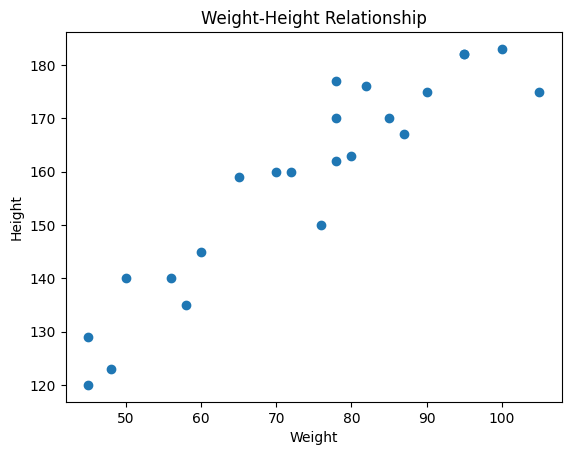

In [33]:
### Visualize the data
plt.scatter(x, y)
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Weight-Height Relationship")

In [34]:
### Train - Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [35]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((18, 1), (5, 1), (18,), (5,))

In [ ]:
### Standardization the independent data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [38]:
### Training the model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

In [39]:
y_pred = regression.predict(x_test)

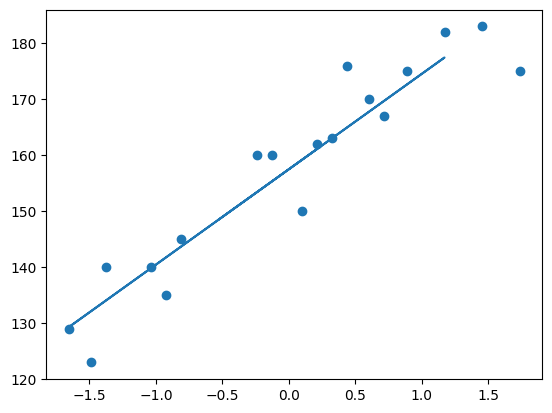

In [43]:
### Visualize the best fit line
plt.scatter(x_train, y_train)
plt.plot(x_test, y_pred)

In [ ]:
### permorance metrices